In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.data import Dataset
import matplotlib.pyplot as plt

In [2]:
# 数据生成
goal_func = tf.math.sin
min_val, max_val, step = -5.0, 5.0, 0.01
num_samples = 100

train_X = tf.expand_dims(tf.range(min_val, max_val, step), axis=-1)
train_y = tf.map_fn(goal_func, train_X)
test_X = tf.expand_dims(tf.sort(tf.linspace(min_val, max_val, num_samples)), axis=-1)
test_y = tf.map_fn(goal_func, test_X)

In [3]:
# 模型定义
class Model:
    def __init__(self, num_hidden):
        # 初始化权重和参数
        self.W1 = tf.Variable(tf.random.normal(shape=(1, num_hidden)), name='Weight1')
        self.b1 = tf.Variable(tf.zeros(shape=(1, num_hidden)), name='bias1')
        
        self.W2 = tf.Variable(tf.random.normal(shape=(num_hidden, 1)), name='Weight2')
        self.b2 = tf.Variable(tf.zeros(shape=(1, 1)), name='bias2')
        
#         self.W2 = tf.Variable(tf.random.normal(shape=(num_hidden, num_hidden)), name='Weight2')
#         self.b2 = tf.Variable(tf.zeros(shape=(1, num_hidden)), name='bias2')
        
#         self.W3 = tf.Variable(tf.random.normal(shape=(num_hidden, 1)), name='Weight3')
#         self.b3 = tf.Variable(tf.zeros(shape=(1, 1)), name='bias3')
        
        self.trainable_variables = [self.W1, self.b1, self.W2, self.b2]
#         self.trainable_variables = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]
        
    def forward(self, x):
        # 前向传播
        h1 = tf.nn.relu(x @ self.W1 + self.b1)
        out = h1 @ self.W2 + self.b2
#         h2 = tf.nn.relu(h1 @ self.W2 + self.b2)
#         out = h2 @ self.W3 + self.b3
        return out

# 创建模型
num_hidden = 256
model = Model(num_hidden)

# 定义损失函数和优化器
loss_fn = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam(learning_rate=0.01)

In [4]:
# 模型训练
num_epochs = 4000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        # 前向传播
        pred_train_y = model.forward(train_X)
        # 计算损失
        train_loss = loss_fn(train_y, pred_train_y)
    
    # 计算梯度并更新参数
    gradients = tape.gradient(train_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    pred_test_y = model.forward(test_X)
    test_loss = loss_fn(test_y, pred_test_y)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    # 输出训练日志
    if (epoch + 1) % 100 == 0:
        print('Epoch: {}, Train Loss: {:.4f}, Test Loss: {:.4f}'\
              .format(epoch + 1, train_loss.numpy(), test_loss.numpy()))


Epoch: 100, Train Loss: 0.1436, Test Loss: 0.1419
Epoch: 200, Train Loss: 0.0875, Test Loss: 0.0872
Epoch: 300, Train Loss: 0.0494, Test Loss: 0.0493
Epoch: 400, Train Loss: 0.0235, Test Loss: 0.0238
Epoch: 500, Train Loss: 0.0135, Test Loss: 0.0142
Epoch: 600, Train Loss: 0.0102, Test Loss: 0.0112
Epoch: 700, Train Loss: 0.0090, Test Loss: 0.0103
Epoch: 800, Train Loss: 0.0086, Test Loss: 0.0100
Epoch: 900, Train Loss: 0.0084, Test Loss: 0.0098
Epoch: 1000, Train Loss: 0.0083, Test Loss: 0.0097
Epoch: 1100, Train Loss: 0.0082, Test Loss: 0.0096
Epoch: 1200, Train Loss: 0.0081, Test Loss: 0.0095
Epoch: 1300, Train Loss: 0.0081, Test Loss: 0.0095
Epoch: 1400, Train Loss: 0.0080, Test Loss: 0.0095
Epoch: 1500, Train Loss: 0.0080, Test Loss: 0.0094
Epoch: 1600, Train Loss: 0.0110, Test Loss: 0.0121
Epoch: 1700, Train Loss: 0.0079, Test Loss: 0.0093
Epoch: 1800, Train Loss: 0.0079, Test Loss: 0.0093
Epoch: 1900, Train Loss: 0.0793, Test Loss: 0.0267
Epoch: 2000, Train Loss: 0.0078, Test L

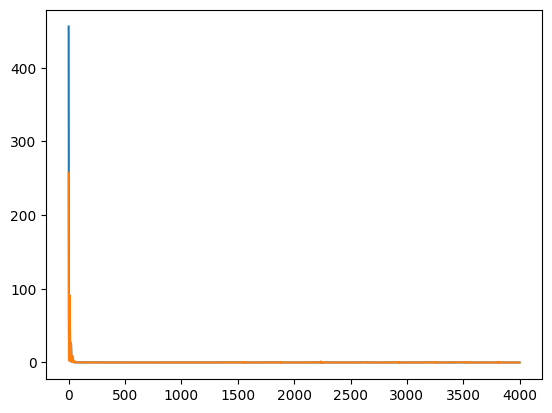

In [5]:
# 训练历史
plt.plot(range(num_epochs), train_losses, label='train loss')
plt.plot(range(num_epochs), test_losses, label='test_loss')
plt.show()

In [6]:
# 模型预测
pred_test_y = model.forward(test_X)
test_mse = loss_fn(test_y, pred_test_y)

Total epoch num: 4000, final test loss: 0.0079


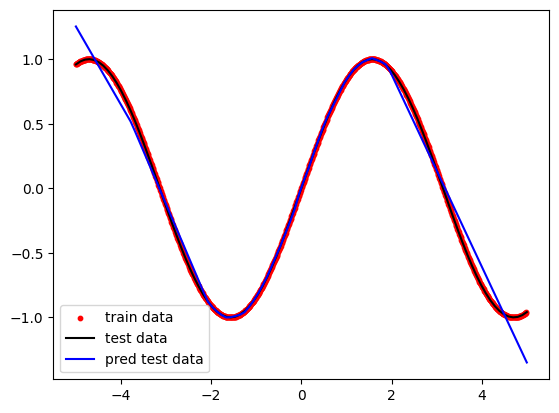

In [8]:
# 显示结果
print('Total epoch num: {}, final test loss: {:.4f}'\
     .format(num_epochs, test_mse))

plt.scatter(train_X, train_y, marker='o', s=10, c='red', label='train data')
plt.plot(test_X, test_y, c='black', label='test data')
plt.plot(test_X, pred_test_y, c='blue', label='pred test data')

plt.legend()
plt.savefig('sin.png')
plt.show()